In [2]:
%%capture
%pip install numpy
%pip install matplotlib
%pip install pandas
import numpy as np
from numpy.linalg import inv
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
temp_data = np.genfromtxt('../../_collectedData.tsv', delimiter='\t', dtype='float')
temp_data = np.delete(temp_data, 0, 0)
temp_stringData = np.genfromtxt('../../_collectedData.tsv', delimiter='\t', dtype=str)
temp_stringData = np.delete(temp_stringData, 0, 0)

address_i = 0
bathrooms_i = 1
bedrooms_i = 2
daysOnMarket_i = 6
lotSize_i = 13
price_i = 14
propertyType_i = 15
squareFootage_i = 18
status_i = 20
yearBuilt_i = 21

data = []
stringData = []

for d, str_d in zip(temp_data, temp_stringData):
    if d[price_i] > 0 and d[price_i] < 1_000_000 and d[lotSize_i] > 0 and d[lotSize_i] < 20000 and d[squareFootage_i] > 0 and d[squareFootage_i] < 3000 and str_d[propertyType_i] == "Single Family" and str_d[status_i] == 'Active':
        data.append(d)
        stringData.append(str_d)
data = np.array(data)

# Plot Sqft Area and Lot Size vs Price

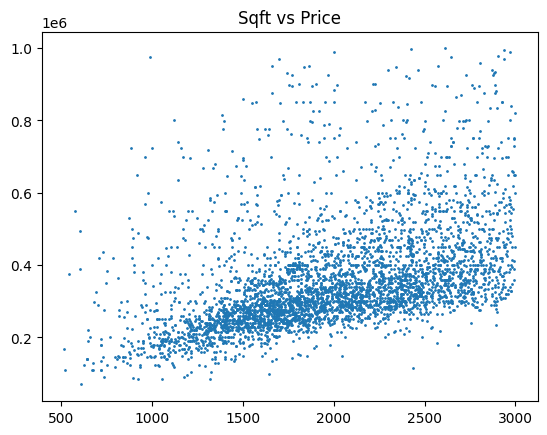

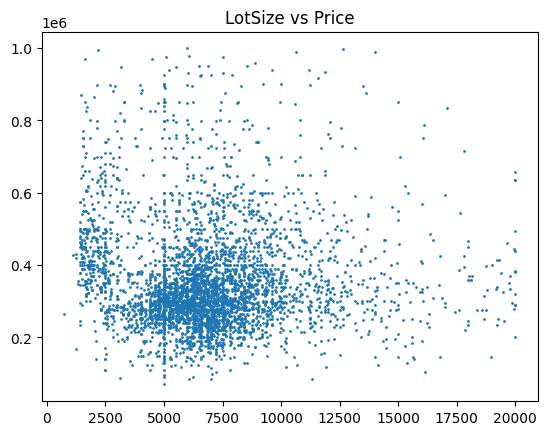

Number of data points included: 4300


In [4]:
plt.title("Sqft vs Price")
plt.scatter(data[:, squareFootage_i], data[:, price_i], s=1)
plt.show()
plt.title("LotSize vs Price")
plt.scatter(data[:, lotSize_i], data[:, price_i], s=1)
plt.show()
print("Number of data points included:", len(data))

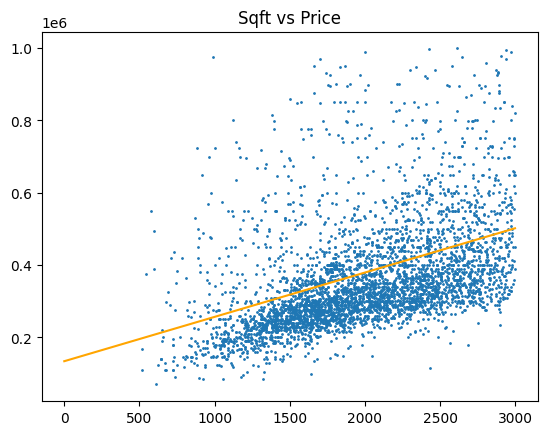

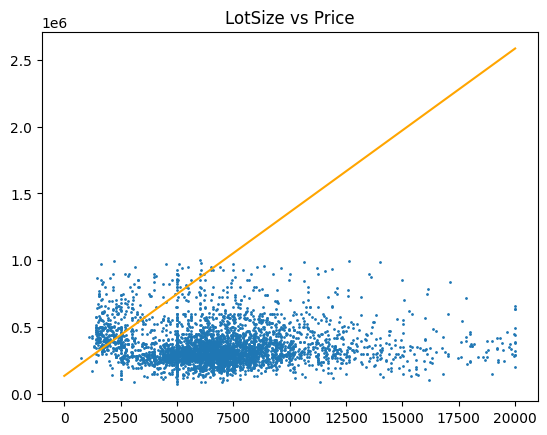

theta0	=	 [134327.645]
theta1	lotSize= [-4.106]
theta2	sqft=	 [126.681]


In [10]:
theta = np.zeros([3, 1]) # init thetas as 0

x0 = np.ones((len(data), 1))
x1 = np.array([data[:, lotSize_i]]).T
x2 = np.array([data[:, squareFootage_i]]).T

X = np.hstack((x0, x1, x2))
Y = np.array([data[:, price_i]]).T

# calc normal equation
# theta = (X.T @ X)^-1 @ X.T @ Y
theta = inv(X.T @ X) @ X.T @ Y

lotSize_x = np.arange(0, np.amax(data[:, lotSize_i]))
squareFootage_x = np.arange(0, np.amax(data[:, squareFootage_i]))
plt.title("Sqft vs Price")
plt.scatter(data[:, squareFootage_i], data[:, price_i], s=1)
plt.plot(squareFootage_x, theta[2, 0] * squareFootage_x + theta[1, 0] * squareFootage_x + theta[0,0], c='orange')
plt.show()
plt.title("LotSize vs Price")
plt.scatter(data[:, lotSize_i], data[:, price_i], s=1)
plt.plot(lotSize_x, theta[2, 0] * lotSize_x + theta[1, 0] * lotSize_x + theta[0,0], c='orange')
plt.show()

print("theta0\t=\t", np.around(theta[0], decimals=3))
print("theta1\tlotSize=", np.around(theta[1], decimals=3))
print("theta2\tsqft=\t", np.around(theta[2], decimals=3))